<a href="https://colab.research.google.com/github/Pratap0120/Deep-Learning-mini-prj/blob/main/multiclass_classification_on_digits_images_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

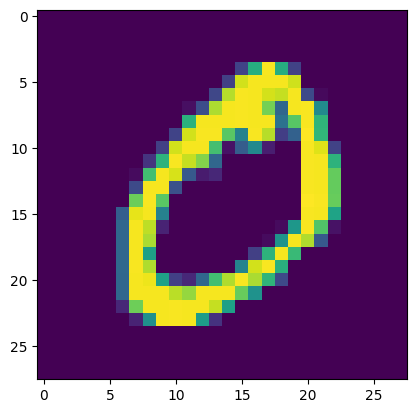

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])

In [7]:
#scaling the data in 0 -1
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
model=Sequential()


In [12]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [39]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.20)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9758 - val_loss: 0.2130
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9993 - loss: 0.0018 - val_accuracy: 0.9767 - val_loss: 0.2053
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9997 - loss: 7.3780e-04 - val_accuracy: 0.9760 - val_loss: 0.2301
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9992 - loss: 0.0030 - val_accuracy: 0.9766 - val_loss: 0.2248
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9994 - loss: 0.0021 - val_accuracy: 0.9778 - val_loss: 0.2128


In [40]:
y_probability=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
y_pred=y_probability.argmax(axis=1)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9793

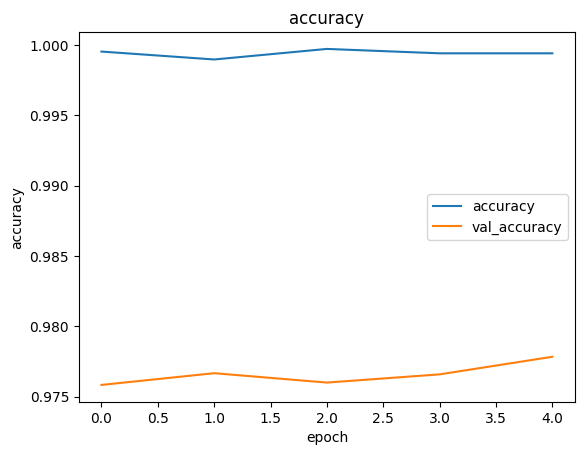

In [43]:
import matplotlib.pyplot as plt
plt.xlabel('epoch')
plt.ylabel('accuracy')
#add title
plt.title('accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

#add legend
plt.legend(['accuracy','val_accuracy','loss','val_loss'])
plt.show()
#add lables to axis


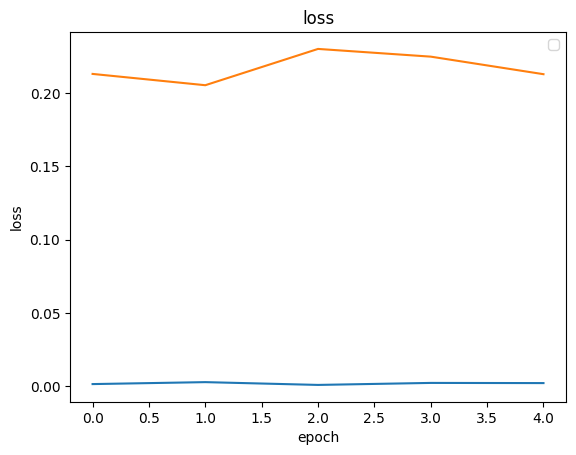

In [44]:
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss'])
plt.title('loss')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])